In [1]:
# Import required libraries for EDA and Data Preparation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from math import radians, cos, sin, asin, sqrt
from scipy import stats

# Import libraries for mapping
import os
from mpl_toolkits.basemap import Basemap

# Import library to hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# License - CC0: Public Domain
# Domain - Public
# Sources - Craigslist.org
# Dataset owner - Austin Reese
# Date created - 2020-01-07
# The Problem Statement - To build a model which predicts the monthly rental of a house based on the given attributes.

# Read the dataset
df = pd.read_csv('housing_train.csv')
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [3]:
print(df.shape)
print(df.url.unique().shape)

# Store length of dataset for tracking data points removed
initial_rows = df.shape[0]

(265190, 22)
(265190,)


In [4]:
# Remove columns of less importance
del df['id']
del df['url']
del df['region_url']
del df['image_url']

# Remove columns containing similar information to that of other features
del df['description']

In [5]:
# Reassign dataframe
features = df

In [6]:
# Check the column data types
features.dtypes

region                      object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
lat                        float64
long                       float64
state                       object
dtype: object

In [7]:
# Check the number of unique values in all columns
for col in features.columns:
    count = features[col].unique().shape[0]
    print(col + ': ' + str(count))

region: 298
price: 3753
type: 12
sqfeet: 3037
beds: 11
baths: 19
cats_allowed: 2
dogs_allowed: 2
smoking_allowed: 2
wheelchair_access: 2
electric_vehicle_charge: 2
comes_furnished: 2
laundry_options: 6
parking_options: 8
lat: 41960
long: 39340
state: 39


In [8]:
# Check if null values exist in any of the columns
(features.astype(np.object).isnull()).any()

region                     False
price                      False
type                       False
sqfeet                     False
beds                       False
baths                      False
cats_allowed               False
dogs_allowed               False
smoking_allowed            False
wheelchair_access          False
electric_vehicle_charge    False
comes_furnished            False
laundry_options             True
parking_options             True
lat                         True
long                        True
state                       True
dtype: bool

In [9]:
# Calculate the total number of null values in all of the columns
for col in features.columns:
    count = features[col].isnull().sum()
    print(col + ' ' + str(count))

region 0
price 0
type 0
sqfeet 0
beds 0
baths 0
cats_allowed 0
dogs_allowed 0
smoking_allowed 0
wheelchair_access 0
electric_vehicle_charge 0
comes_furnished 0
laundry_options 54311
parking_options 95135
lat 1419
long 1419
state 1


In [10]:
# If laundry_options or parking_options are missing, assign "unknown" as ~20% and ~40% of values are missing respectively
features['laundry_options'].fillna("unknown", inplace=True)
features['parking_options'].fillna("unknown",inplace=True)

In [11]:
# Check the record missing the state
features.iloc[265189]

region                            columbus
price                                 1164
type                             townhouse
sqfeet                                1300
beds                                     2
baths                                  2.5
cats_allowed                             1
dogs_allowed                             1
smoking_allowed                          0
wheelchair_access                        0
electric_vehicle_charge                  0
comes_furnished                          0
laundry_options                w/d hookups
parking_options            attached garage
lat                                    NaN
long                                   NaN
state                                  NaN
Name: 265189, dtype: object

In [12]:
# Drop the record Since longitude and latitude is missing, there is no way to impute the missing point
features = features.drop(265189)

In [13]:
# Calculate the total number of null values in all of the columns again
for col in features.columns:
    count = features[col].isnull().sum()
    print(col + ' ' + str(count))

region 0
price 0
type 0
sqfeet 0
beds 0
baths 0
cats_allowed 0
dogs_allowed 0
smoking_allowed 0
wheelchair_access 0
electric_vehicle_charge 0
comes_furnished 0
laundry_options 0
parking_options 0
lat 1418
long 1418
state 0


In [14]:
# Calculate the median longitude and latitude for all states to assign to replace null values
state_long_median = features.groupby('state')['long'].transform('median')
features['long'] = features['long'].fillna(state_long_median)
state_lat_median = features.groupby('state')['lat'].transform('median')
features['lat'] = features['lat'].fillna(state_lat_median)

In [15]:
# Calculate the total number of null values in all of the columns again
for col in features.columns:
    count = features[col].isnull().sum()
    print(col + ' ' + str(count))

region 0
price 0
type 0
sqfeet 0
beds 0
baths 0
cats_allowed 0
dogs_allowed 0
smoking_allowed 0
wheelchair_access 0
electric_vehicle_charge 0
comes_furnished 0
laundry_options 0
parking_options 0
lat 0
long 0
state 0


In [16]:
# Replace region and state with a code starting at 0
features['region_code'] = pd.factorize(features.region)[0]
features['state_code'] = pd.factorize(features.state)[0]

# Remove region and state columns
del features['region']
del features['state']

In [17]:
# Check the first 5 rows to confirm that all changes have occured
features.head()

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,region_code,state_code
0,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,0,0
1,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,0,0
2,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,0,0
3,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,0,0
4,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,0,0


In [18]:
# Assign the PROJ_LIB variable for Basemap
os.environ['PROJ_LIB'] = r'C:\Users\bmajeed\Anaconda3\Library\share'

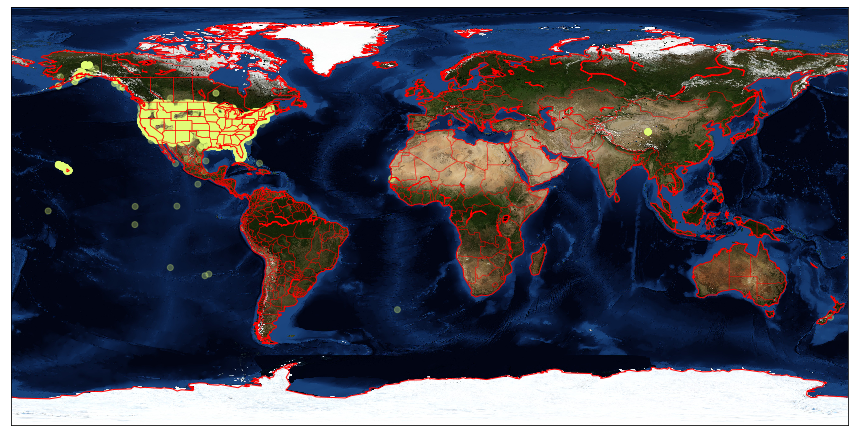

In [19]:
# Create numpy arrays for the longitude, latitude and price columns for mapping
lat = features['lat'].values
long = features['long'].values
price = features['price'].values

# Check the geographical distribution of the posts to identify mislabeled posts
fig = plt.figure(figsize=(15,18))
m = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,rsphere=(6378137.00,6356752.3142))
m.bluemarble()
m.drawcoastlines(color='red')
m.drawcountries(color='red')
m.drawstates(color='red')

m.scatter(long, lat, latlon=True,
          c=price, cmap='Wistia', alpha=0.3)

In [20]:
# Use the USA longitude and latitude to remove mislabeled posts
features = features[(features['long'] >= -180) & (features['long'] <= -50)]
features = features[(features['lat'] >= 10) & (features['lat'] <= 80)]

In [21]:
# Store the new length of the dataset and calculate rows removed
filtered_rows = features.shape[0]
filtered_rows
print(f'Rows removed using longitude and latitude range: {initial_rows - filtered_rows}')

Rows removed using longitude and latitude range: 256


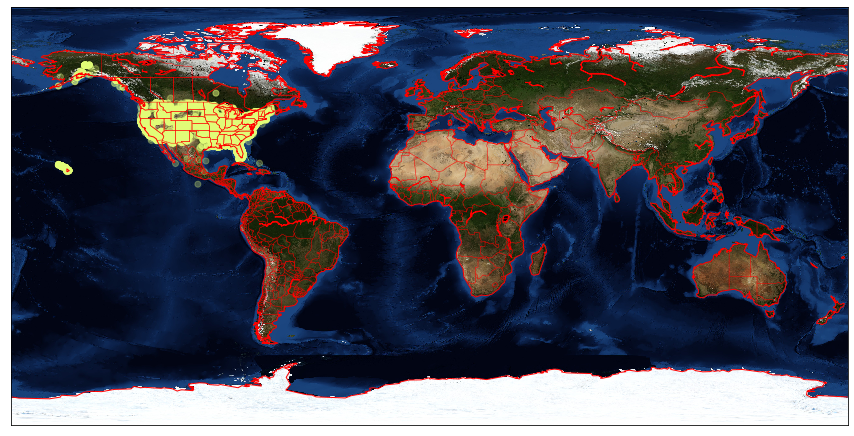

In [22]:
# Recreate numpy arrays for the longitude, latitude and price columns for mapping
lat = features['lat'].values
long = features['long'].values
price = features['price'].values

# Check the geographical distribution of the posts to ensure mislabeled posts are removed
fig = plt.figure(figsize=(15,18))
m = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,rsphere=(6378137.00,6356752.3142))
m.bluemarble()
m.drawcoastlines(color='red')
m.drawcountries(color='red')
m.drawstates(color='red')

m.scatter(long, lat, latlon=True,
          c=price, cmap='Wistia', alpha=0.3)

In [23]:
# Calculate price per square foot for data cleaning purposes
# Price per square foot can be a good identifier of unreliable posts
features['price_per_sqft'] = features['price'] / features['sqfeet']

In [24]:
# Check the basic statistics of most variables, text variable are not shown below and will be checked using box plots
# It is important to note posts with $0 rental price, 0 square feet, 0 bedroom, 0 bathrooms, etc.
# It is also important to note the high standard deviation of the price and square feet, not realistic
# Also, the maximum rental price is shown as $2,768,307,000
# Due to the min and max of price and square feet, price per square foot in not correct
features.describe().T

,count,mean,std,min,25%,50%,75%,max
price,264934.0,1.228388e+04,5.378949e+06,0.000,817.000000,1060.000000,1450.000000,2.768307e+09
sqfeet,264934.0,1.093825e+03,2.308002e+04,0.000,752.000000,950.000000,1156.000000,8.388607e+06
beds,264934.0,1.912446e+00,3.693656e+00,0.000,1.000000,2.000000,2.000000,1.100000e+03
baths,264934.0,1.483141e+00,6.302861e-01,0.000,1.000000,1.000000,2.000000,7.500000e+01
cats_allowed,264934.0,7.165936e-01,4.506529e-01,0.000,0.000000,1.000000,1.000000,1.000000e+00
dogs_allowed,264934.0,6.963130e-01,4.598500e-01,0.000,0.000000,1.000000,1.000000,1.000000e+00
smoking_allowed,264934.0,7.336657e-01,4.420419e-01,0.000,0.000000,1.000000,1.000000,1.000000e+00
wheelchair_access,264934.0,7.883473e-02,2.694811e-01,0.000,0.000000,0.000000,0.000000,1.000000e+00
electric_vehicle_charge,264934.0,1.437339e-02,1.190246e-01,0.000,0.000000,0.000000,0.000000,1.000000e+00
comes_furnished,264934.0,4.868760e-02,2.152145e-01,0.000,0.000000,0.000000,0.000000,1.000000e+00


In [25]:
# https://www.businessinsider.com/largest-homes-in-the-us-ranked-mansions-2019-6
# https://www.curbed.com/2011/11/10/10425672/these-are-five-of-the-smallest-rental-apartments-in-america
# largest homes in the US are under 70000 square feet
# smallest homes in the US are above 100 square feet
features = features[features['sqfeet'] <= 70000]
features = features[features['sqfeet'] >= 100]

# https://www.sothebysrealty.com/eng/rentals/int/price-high-sort
# prices above 1 million per month are stores or office spaces
features = features[features['price'] <= 1000000]
features = features[features['price'] > 0]

# https://www.statista.com/statistics/879118/rent-per-square-foot-in-apartments-by-state-usa/
# lowest state average of 0.74
# highest state average of 2.95
# https://www.apartmentguide.com/blog/cities-with-most-expensive-apartments-per-square-foot/
# highest city average studio rental price per square foot is 7.71
# highest city average 2-bedroom rental price per square foot is 7.03
# Manhattan average luxury condos rental price per square foot is 105
features = features[features['price_per_sqft'] >= 0.25]
features = features[features['price_per_sqft'] <= 150.00]

# beds and baths should be less than 50 to remove outliers
features = features[features['beds'] <= 50]
features = features[features['baths'] <= 50]

In [26]:
# Remove price per square foot as it is not required and was used to remove outliers
del features['price_per_sqft']

In [27]:
# Store the new length of the dataset and calculate rows removed
filtered_rows = features.shape[0]
filtered_rows
print(f'Rows removed after using rental market research: {initial_rows - filtered_rows}')

Rows removed after using rental market research: 3094


In [28]:
# Check the basic statistics again of most variables, text variable are not shown below and will be checked using box plots
# Numbers look a lot more realistic, the standard deviations are high for price and square feet
# The standard deviation is good enough to use for more popular statistical methods for removing outliers
features.describe().T

,count,mean,std,min,25%,50%,75%,max
price,262096.0,1249.856629,2036.429325,69.000,825.0000,1070.0000,1450.0000,530650.0000
sqfeet,262096.0,999.518993,389.496478,100.000,754.0000,950.0000,1154.0000,13060.0000
beds,262096.0,1.896736,0.877699,0.000,1.0000,2.0000,2.0000,8.0000
baths,262096.0,1.480879,0.587945,0.000,1.0000,1.0000,2.0000,7.5000
cats_allowed,262096.0,0.718279,0.449839,0.000,0.0000,1.0000,1.0000,1.0000
dogs_allowed,262096.0,0.697840,0.459195,0.000,0.0000,1.0000,1.0000,1.0000
smoking_allowed,262096.0,0.734315,0.441698,0.000,0.0000,1.0000,1.0000,1.0000
wheelchair_access,262096.0,0.078986,0.269718,0.000,0.0000,0.0000,0.0000,1.0000
electric_vehicle_charge,262096.0,0.014449,0.119332,0.000,0.0000,0.0000,0.0000,1.0000
comes_furnished,262096.0,0.047666,0.213058,0.000,0.0000,0.0000,0.0000,1.0000


In [29]:
# Check the skewness and kurtosis for the price
# This is very skewed data due high price points, e.g luxury condos in Manhattan
print("Skewness: %f" % features['price'].skew())
print("Kurtosis: %f" % features['price'].kurt())

Skewness: 163.195499
Kurtosis: 35975.592283


In [30]:
# Calculate the 25th and 75th quartiles of the price and square feet
Q1_price, Q1_sqft = features['price'].quantile(0.25), features['sqfeet'].quantile(0.25)
Q3_price, Q3_sqft = features['price'].quantile(0.75), features['sqfeet'].quantile(0.75)

# Determine the Interquartile range to filter out records outside of ~3 standard deviations
IQR_price, IQR_sqft = Q3_price - Q1_price, Q3_sqft - Q1_sqft

In [31]:
# Remove records where price and sqaure feet are not within ~3 standard deviations
# IQR method removes more outliers than Z-score since it looks at about 2.7 instead of 3 standard deviations
features = features[(features['price'] >= Q1_price - (1.5 * IQR_price)) & (features['sqfeet'] >= Q1_sqft - (1.5 * IQR_sqft))]
features = features[(features['price'] <= Q3_price + (1.5 * IQR_price)) & (features['sqfeet'] <= Q3_sqft + (1.5 * IQR_sqft))]

In [32]:
# Check the skewness and kurtosis for the price
# Looks much better
print("Skewness: %f" % features['price'].skew())
print("Kurtosis: %f" % features['price'].kurt())

Skewness: 0.752843
Kurtosis: 0.145184


In [33]:
# Store the new length of the dataset and calculate total rows removed so far
filtered_rows = features.shape[0]
filtered_rows
print(f'Rows removed after using IQR method: {initial_rows - filtered_rows}')

Rows removed after using IQR method: 24070


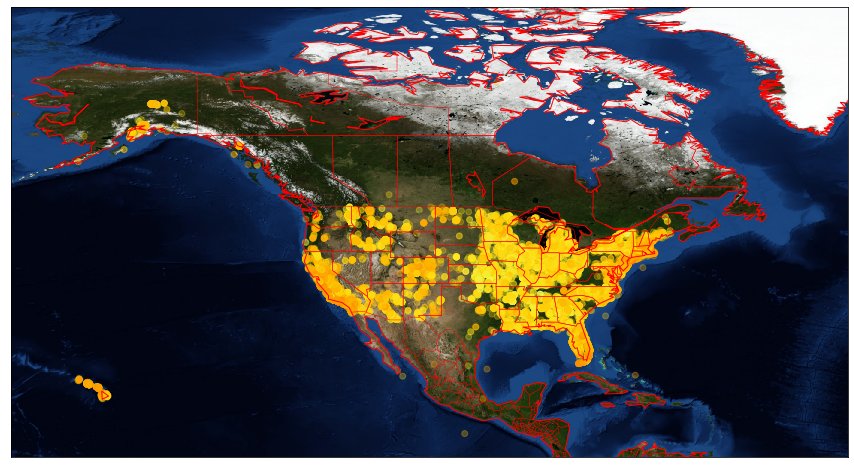

In [34]:
# Recreate numpy arrays for the longitude, latitude and price columns for mapping
lat = features['lat'].values
long = features['long'].values
price = features['price'].values

# Check the geographical distribution of the posts
# Better heap map is showing based on price
fig = plt.figure(figsize=(15,18))
m = Basemap(llcrnrlon=-170,llcrnrlat=10.,urcrnrlon=-40,urcrnrlat=80,rsphere=(6378137.00,6356752.3142))
m.bluemarble()
m.drawcoastlines(color='red')
m.drawcountries(color='red')
m.drawstates(color='red')

m.scatter(long, lat, latlon=True,
          c=price, cmap='Wistia', alpha=0.3)

In [35]:
# Use harvesine distance to map longitude and latitude to a single point on Earth from the (0, 0) coordinate
# https://datascience.stackexchange.com/questions/49553/combining-latitude-longitude-position-into-single-feature
def single_pt_haversine(lat, lng, degrees=True):
    r = 6371 
    if degrees:
        lat, lng = map(radians, [lat, lng])
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a)) 
    return d

# Convert longitude and latitude to harvesine distance
features['harvesine_distance'] = [single_pt_haversine(x, y) for x, y in zip(features.lat, features.long)]

In [36]:
# Check the first 5 rows to confirm that all changes have occured
features.head()

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,region_code,state_code,harvesine_distance
1,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,0,0,9710.865407
2,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,0,0,9701.935660
3,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,0,0,9701.935660
4,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,0,0,9701.935660
5,900,apartment,1298,2,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,0,0,9701.935660


In [37]:
# Remove the longitude and latitude columns as they are no longer required
del features['lat']
del features['long']

In [38]:
# Check the basic statistics again of most variables, text variable are not shown below and will be checked using box plots
# The statitics look much better than before
features.describe().T

,count,mean,std,min,25%,50%,75%,max
price,241120.0,1115.734775,411.109903,69.000000,804.000000,1025.000000,1361.00000,2387.000000
sqfeet,241120.0,942.001356,272.615969,154.000000,750.000000,930.000000,1105.00000,1754.000000
beds,241120.0,1.821761,0.812180,0.000000,1.000000,2.000000,2.00000,8.000000
baths,241120.0,1.432469,0.546330,0.000000,1.000000,1.000000,2.00000,5.500000
cats_allowed,241120.0,0.729541,0.444198,0.000000,0.000000,1.000000,1.00000,1.000000
dogs_allowed,241120.0,0.706611,0.455316,0.000000,0.000000,1.000000,1.00000,1.000000
smoking_allowed,241120.0,0.749950,0.433042,0.000000,0.000000,1.000000,1.00000,1.000000
wheelchair_access,241120.0,0.074121,0.261968,0.000000,0.000000,0.000000,0.00000,1.000000
electric_vehicle_charge,241120.0,0.010883,0.103750,0.000000,0.000000,0.000000,0.00000,1.000000
comes_furnished,241120.0,0.042274,0.201213,0.000000,0.000000,0.000000,0.00000,1.000000


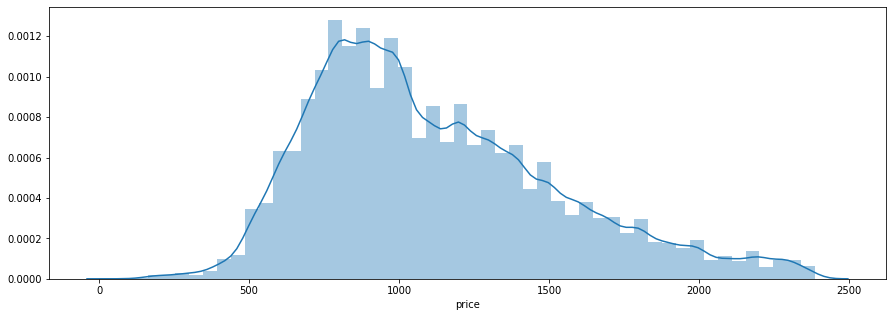

In [39]:
# Check the distribution of price
plt.figure(figsize=(15, 5))
sns.distplot(features['price'])

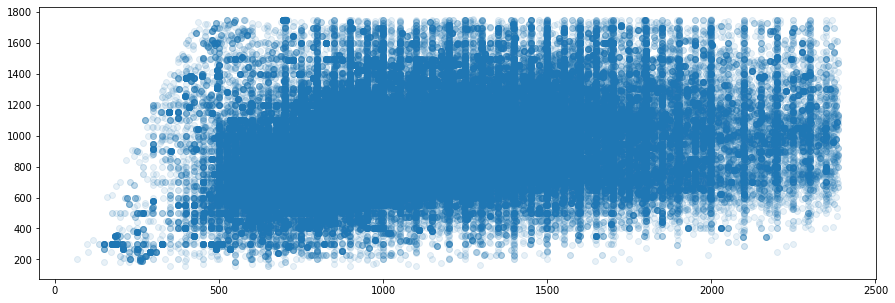

In [40]:
# Check the scatter plot of price and square feet
plt.figure(figsize=(15, 5))
plt.scatter(features['price'], features['sqfeet'], alpha=0.1)

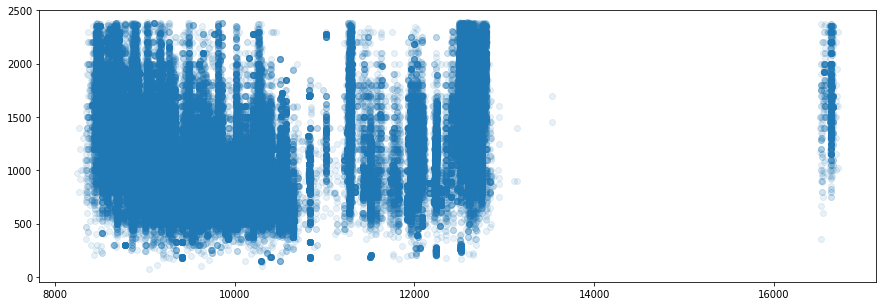

In [41]:
# Check the scatter plot of price and the harvesine distance
plt.figure(figsize=(15, 5))
plt.scatter(features['harvesine_distance'], features['price'], alpha=0.1)

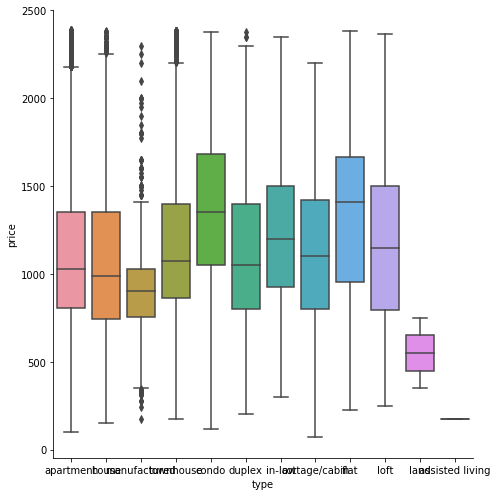

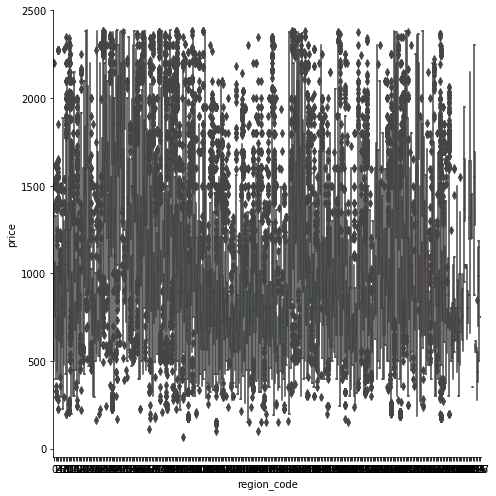

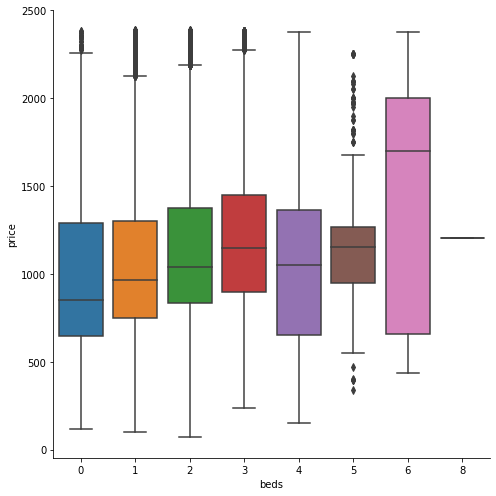

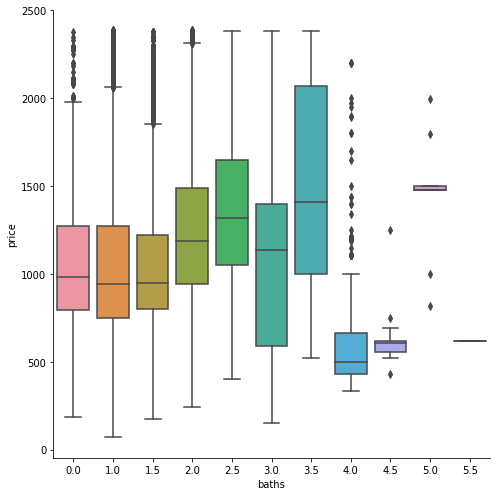

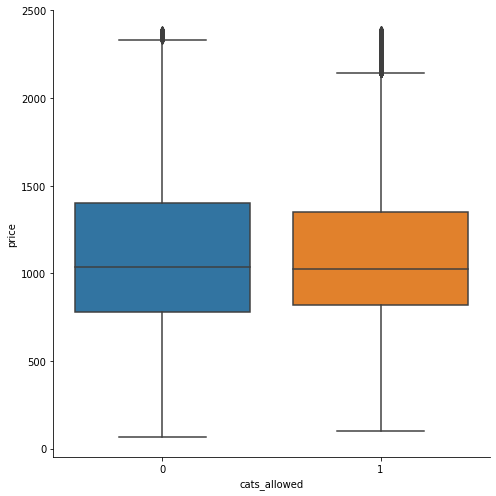

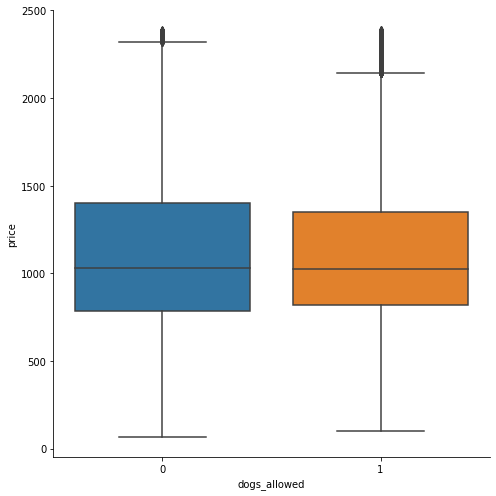

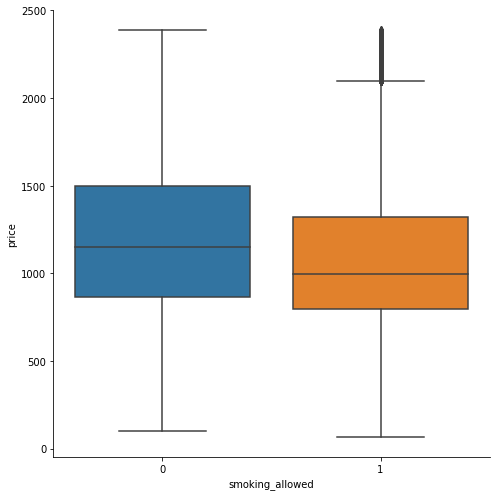

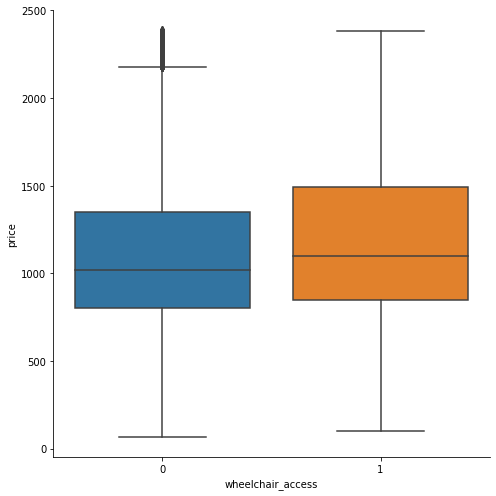

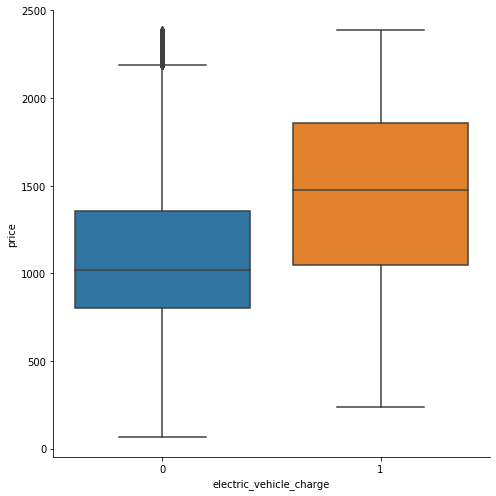

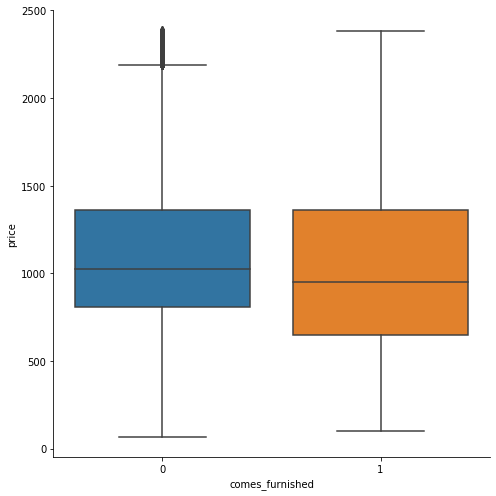

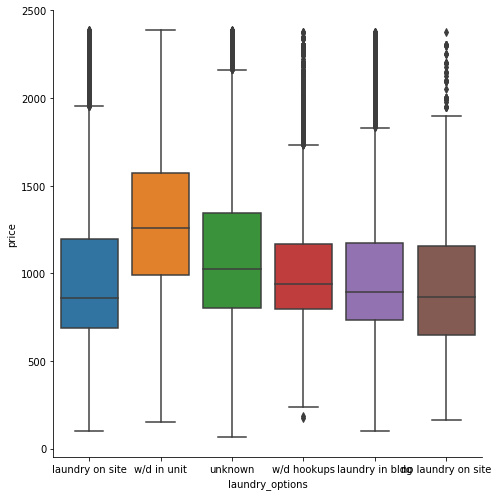

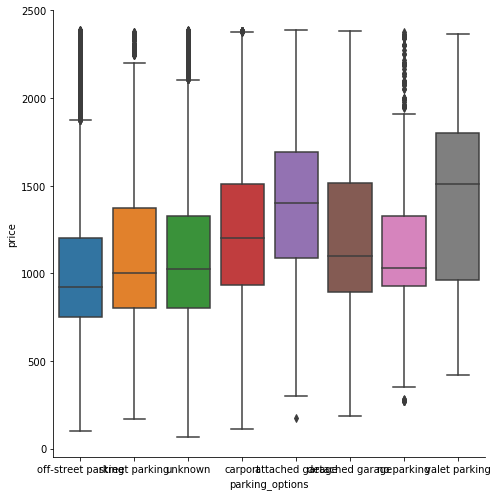

In [42]:
# Generate box plots for all categorical variables
# All variables except the cats_allowed and dogs_allowed columns have varying quartiles
for col in ['type', 'region_code', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options']:
    sns.factorplot(x=col, y="price", data=features, kind="box", size=7, aspect=1);

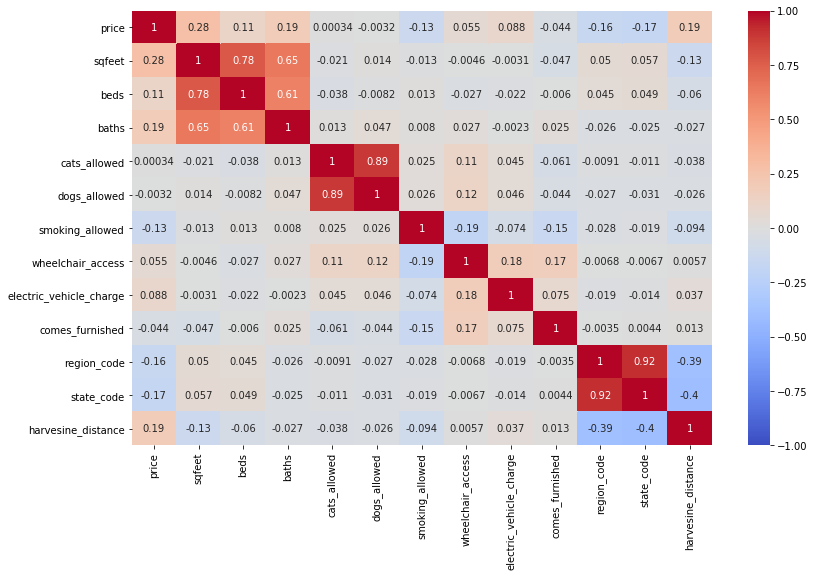

In [43]:
# Check the correlation between all variables
# There are some highly correlated variables
plt.figure(figsize=(13, 8))
sns.heatmap(features.corr(), vmin=-1, cmap='coolwarm', annot=True)

In [44]:
# Ignoring cats_allowed and dogs_allowed based on box plots
# Ignoring state_code as region_code has a 0.92 correlation
features_num = ['sqfeet', 'harvesine_distance', 'beds', 'baths']
features_cat = ['type', 'region_code', 'smoking_allowed', 'electric_vehicle_charge', 'wheelchair_access', 'comes_furnished', 'laundry_options', 'parking_options']

In [45]:
# Scale the square feet and harvesine distance
# Use log to scale square feet and divide the harvesine distance by 1000 to scale
features['sqfeet'] = np.log(features['sqfeet'])
features['harvesine_distance'] = features['harvesine_distance'] / 1000

In [46]:
# Import sklearn modules required for encoding categorical variable, and splitting train and test data
from sklearn import preprocessing
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn.model_selection import train_test_split

In [47]:
# Create a function to apply OneHotEncoder to a categorical variable
def encode_string(cat_features):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ohe = preprocessing.OneHotEncoder(sparse=True)
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

In [48]:
# Create a function to run the loop on all categorical variables of importance and apply the OneHotEncoder function
# Returns a numpy array
def encode_cat_features(cat_features):
    cat_features = features_cat[1:]
    f = encode_string(features[features_cat[0]])
    for cat in cat_features:
        enc = encode_string(features[cat])
        f = np.concatenate([f,enc],1)
    return f

In [49]:
# Encode and store the categorical variables
encoded = encode_cat_features(features)
encoded[:,:]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [50]:
# Since the numerical variable are scaled, tranform the variables to a numpy array
numeric_features = np.array(features[features_num])
numeric_features[:,:]

array([[7.18462915, 9.71086541, 3.        , 2.        ],
       [7.03262426, 9.70193566, 1.        , 1.5       ],
       [6.83195357, 9.70193566, 1.        , 1.        ],
       ...,
       [6.92755791, 9.41734947, 2.        , 1.5       ],
       [7.41457288, 9.41592828, 2.        , 1.5       ],
       [7.10660614, 9.36617305, 3.        , 1.5       ]])

In [51]:
# Tranform the price to a numpy array
labels = np.array(features['price'])
labels[:]

array([1120,  825,  800, ..., 1069, 1507, 1001], dtype=int64)

In [52]:
# Merge the categorical and numerical into a single numpy array, and check the shape of the array
features_arr = np.concatenate([encoded, numeric_features], 1)
print(features_arr.shape)
print(features_arr[:1])
print(labels[:1])

(241120, 336)
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.

In [53]:
# Create a function to print basic metrics for machine learning model evaluation
def print_metrics(y_true, y_predicted, n_parameters):
    plt.figure(figsize=(15, 5))
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
# Create a function to generate a histogram of errors to view the distribution of residuals
def hist_resids(y_test, y_score):
    plt.figure(figsize=(15, 5))
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
# Create a function to generate a plot of predicted values and residuals
def resid_plot(y_test, y_score):
    plt.figure(figsize=(15, 5))
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    sns.regplot(y_score, resids, fit_reg=False, scatter_kws={'alpha':0.1})
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()

In [54]:
# Import Random Forest Regressor
# Using random forest as:
#  It has the power to handle a large data set with higher dimensionality
#  It provides higher accuracy
#  Combining many weak learners into strong learners, this averages away the variance
#  Model might overfit so hyperparameter tuning is necessary
from sklearn.ensemble import RandomForestRegressor

In [55]:
# Split data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(features_arr, labels, test_size=0.3, random_state=42, shuffle=True)

In [56]:
# Fit and predict the Random Forest Regressor with 128 trees
# The RMSE is more responsive to outliers showing that there are points that were not predicted well at all
# The MAE shows the mean error between the predicted and actual value, ~$60 in either direction
# Adjusted R-Squared of ~90% shows the explanatory power of the regression model
rand_regressor = RandomForestRegressor(n_estimators=128)
rand_regressor.fit(X_train, y_train)
scores = rand_regressor.predict(X_test)
print_metrics(y_test, scores, 12)

Mean Square Error      = 17009.20514540373
Root Mean Square Error = 130.419343447986
Mean Absolute Error    = 62.00069733885489
Median Absolute Error  = 17.73542836286981
R^2                    = 0.8992152633483801
Adjusted R^2           = 0.8991999346593811


<Figure size 1080x360 with 0 Axes>

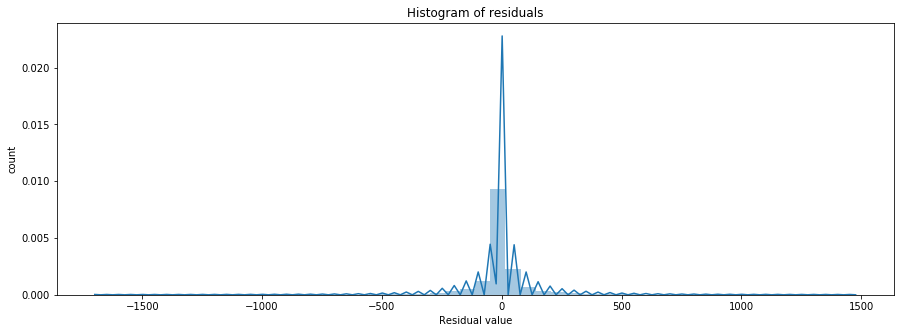

In [57]:
# View the distribution of residuals
# Peak at 0 but as expected, large tails
hist_resids(y_test, scores)

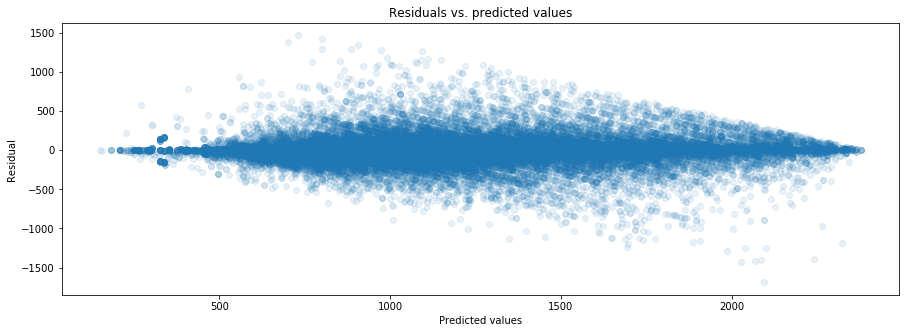

In [58]:
# View the residuals of predicted values
# Outliers were predicted incorrectly causing the high RMSE
resid_plot(y_test, scores)

In [ ]:
# Hyperparameter tuning
# Since the dataset is large, running 100s of iterations of the randomized search for tuning could take some time
# Not currently run

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rand_regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)